# 02. PyTorch Neural Network Classification

What is a classification problem?

A classification problem involves predicting whether something is one thing or another.

For example, you might want to:

* Problem type	What is it?	Example
Binary classification	Target can be one of two options, e.g. yes or no	Predict whether or not someone has heart disease based on their health parameters.

* Multi-class classification	Target can be one of more than two options	Decide whether a photo is of food, a person or a dog.

* Multi-label classification	Target can be assigned more than one option	Predict what categories should be assigned to a Wikipedia article (e.g. mathematics, science & philosophy).

## 1. Make classification data and get it ready

In [4]:
import sklearn

In [5]:
from sklearn.datasets import make_circles

#Make 1000 samples
n_samples = 1000

# Create 2 classes with 2 features
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [6]:
len(X),len(y)

(1000, 1000)

In [7]:
print(f"Print 5 first samples of X\n {X[:5]}")
print(f"Print 5 first samples of y \n{y[:5]}")

Print 5 first samples of X
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
Print 5 first samples of y 
[1 1 1 1 0]


In [8]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [9]:
# MAke dataframe of circle data
import pandas as pd
circles = pd.DataFrame({ "X1": X[:, 0],
                        "X2": X[:, 1],
                         "label": y})

circles.head(10)


,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


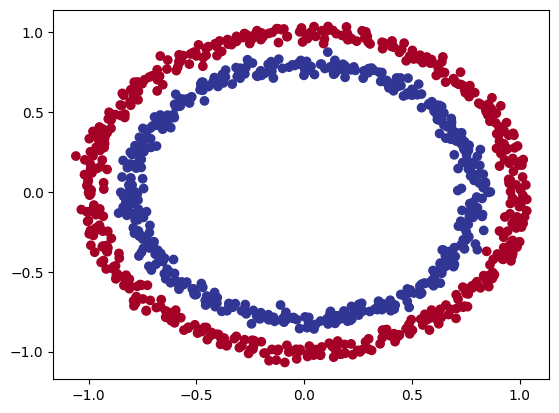

In [10]:
# Visualize, visualize visualiz
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y= X[:, 1],
            c=y,
            cmap= plt.cm.RdYlBu);

**Note**: The data we are working with is often refereed to as a toy dataset, a dataset that is small enough to experiment but still sizeable enough to practice the fundamentals

### 1.1 Check input and output shapes

In [11]:
X.shape,y.shape

((1000, 2), (1000,))

In [12]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [13]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]
print(f"values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
shapes for one sample of X: (2,) and the same for y: ()


### 1.2 Turn data tensor and create train and test splits

In [14]:
import torch
torch.__version__

'2.6.0+cu124'

In [15]:
type(X)

numpy.ndarray

In [16]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5],y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [17]:
type(X)

torch.Tensor

In [18]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split

X_train ,X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,  # 20% of data will be test
                                                    random_state=42)

In [19]:
len(X_train),len(X_test),len(y_train),len(y_test)

(800, 200, 800, 200)

## 2. Building a model

Let's build a model to classify our blue and red dots.

 TO do so, we want to:

 1. setup device agnostic code so our code will run on an accelerator (GPU) if there is one
 2. Construct a model (by subclassing `nn>Module`)
 3. Define a loss function and optimizer
 4. Create a training and test loop

In [20]:
# Import pytorch and nn
import torch
from torch import nn

# MAke device agnostic
device = "cuda" if torch.cuda.is_available() else "cpu"
device


'cpu'

Now we have setup device agnostic code, let's create a model that:
1. subclasses `nn.Module`
2. create 2 `nn.Linear()` layers that are capable of handling the shapes of our data
3. Defines a `forward()` method that outlines the porward pass or forward computation
4. Instatiate an instance of our model class and send it to the target `device`

In [21]:
X_train.shape,

(torch.Size([800, 2]),)

In [22]:
# 1. Construct a model that subclasses nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2.Create 2 nn.Linear layers capable of handling the shapes of our data
    self.layer_1 = nn.Linear(in_features=2,out_features=5) # Takes in 2 features and upscales to 5 features
    self.layer_2 = nn.Linear(in_features=5,out_features=1) # Takes in 5 features from previous layer and outputs a single feature(same as y)



  # 3. Define a forward() method that outlines the forward pass
  def forward(self,x):
    return self.layer_2(self.layer_1(x)) # x -> layer_1 -> layer_2 -> output

  #4. Istantiate an instance of our model class and send it to the target device
model_0 = CircleModelV0().to(device)
model_0



CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [23]:
device

'cpu'

In [24]:
next(model_0.parameters()).device

device(type='cpu')

In [25]:
# Let's replicate the model above using nn.sequential()
model_0 = nn.Sequential(
    nn.Linear(in_features=2,out_features=5),
    nn.Linear(in_features=5,out_features=1)
).to(device)

model_0


Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [26]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.1660,  0.2027],
                      [-0.4134,  0.0305],
                      [ 0.6705,  0.2614],
                      [ 0.6543,  0.3436],
                      [ 0.6920, -0.1361]])),
             ('0.bias', tensor([-0.1924, -0.2160,  0.0170, -0.2918, -0.1853])),
             ('1.weight',
              tensor([[-0.2837,  0.2698, -0.4135,  0.0392,  0.2527]])),
             ('1.bias', tensor([-0.3931]))])

In [27]:
# Make predictions
with torch.inference_mode():
 untrained_preds = model_0(X_test.to(device))
print(f'Lenght of Predictions: {len(untrained_preds)}, Shape of predictions: {untrained_preds.shape}')
print(f'Lenght of test samples: {len(X_test)}, Shape of test samples: {X_test.shape}')
print(f'\nFirst 10 predictions: {torch.round(untrained_preds[:10])}')
print(f'\nFirst 10 test samples: {y_test[:10]}')

Lenght of Predictions: 200, Shape of predictions: torch.Size([200, 1])
Lenght of test samples: 200, Shape of test samples: torch.Size([200, 2])

First 10 predictions: tensor([[-1.],
        [-1.],
        [-0.],
        [-1.],
        [-0.],
        [-0.],
        [-1.],
        [-1.],
        [-0.],
        [-1.]])

First 10 test samples: tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [28]:
device

'cpu'

### 2.1 Setup loss function and optimizer

Which loss function and optimizer should you use?

Again this is problem specific.
For example for regression you might want MAE or MSE(Mean absolute error, mean squared error)

For classification you might want want binary cross entropy and categorical cross entropy(cross entropy)

As a reminder, the loss function measures how *wrong* your models predictions are.
And for optimizers , two of the most common and useful are SGD and Adam, however Pytorch has many built-in options


* For the loss function we are going to use `torch.nn.BECWithLogitsLoss` from  Binary Cross entropy
* What is a logit in deep learning
* For different optimizers see `torch.optim`

What is a Logit?
👉 A logit is just the raw output of a neural network before applying an activation function (like sigmoid or softmax).

It can be any number: -5, 0.7, 10, etc.

**Sigmoid** squashes numbers between 0 and 1.
📌 When to use it?
✅ Binary classification (2 classes: yes/no, spam/not spam).
Because you just need one probability → if it's > 0.5, predict class 1.

**Softmax** converts logits to probabilities for multiple classes.
📌 When to use it?
✅ Multi-class classification (3+ classes: cat/dog/rabbit).
Because you want probabilities that sum to 1 for all classes.


In [29]:
# Setup loss function
#loss_fn = nn.BCELoss() #BCELoss = requires inputs to have gone through the sigmoid activation function prior to input to BCELoss
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid activation function built in

# Setup optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [30]:
# Calculate accuracy - Out of 100 examples, what percentage does our model get right
def accuracy_fn(y_true,y_pred):
  correct = torch.eq(y_true,y_pred).sum().item() # torch.eq() calculates where two tensors are equal
  acc = (correct/len(y_pred))*100
  return acc


## 3. Train Model

To train our model, we are going to need to build a training loop:

1. Forward Pass
2. calculate the loss
3. Optimizer zero grad
4. Loss backward(backpropagation)
5. Optimizer step(gradient descent)

### 3.1 Going from raw logits -> prediction probabilities -> prediction labels

Our model output are going to be raw **logits**.

We can convert these **logits** into prediction probabilities by passing
 them to some kind of activation function(e.g sigmoid bor binary classification and softmax for multiclassification).

Then we can convert our model's prediction probabilities to **prediction labels** by either rounding them or taking the `argmax()`.

In [31]:
# View the first 5 outputs of the forward pass on test data
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits


tensor([[-0.5308],
        [-0.6354],
        [-0.3067],
        [-0.5941],
        [-0.3862]])

In [32]:
y_test[:5]


tensor([1., 0., 1., 0., 1.])

In [33]:
# Use the sigmoid function on our model logits to turn them into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.3703],
        [0.3463],
        [0.4239],
        [0.3557],
        [0.4046]])

For our prediction values, we need to perform a range style rounding on them:
*`y_pred_probs >=0.5, y=1 (class1)`

*`y_pred_probs < 0.5, y=0 (class0)`

In [34]:
torch.round(y_pred_probs)

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]])

In [35]:
# Find the predicted labels
y_preds = torch.round(y_pred_probs)

# Full (logits -> pred_probs -> pred labels)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for quality
print(torch.eq(y_preds.squeeze(),y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([0., 0., 0., 0., 0.])

### 3.2 Building a training and testing loop

In [36]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs =1000

#Put data to target device
X_train,y_train = X_train.to(device),y_train.to(device)
X_test,y_test = X_test.to(device),y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
  ### Training
  model_0.train()

  # 1. Forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # 2. Calculate loss/accuracy
  # loss = loss_fn(torch.sigmoid(y_logits),y_train) # nn.BCELoss expect prediction probabilities

  loss = loss_fn(y_logits,  # nn>BCEWithLogitsLoss expexts raw logits as input
                 y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ### Testing
  model_0.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. calculate test loss/acc
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

  # Print what is happening
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")




Epoch: 0 | Loss: 0.72297, Acc: 50.00% | Test Loss: 0.71644, Test Acc: 50.00%
Epoch: 10 | Loss: 0.70886, Acc: 50.00% | Test Loss: 0.70311, Test Acc: 50.00%
Epoch: 20 | Loss: 0.70209, Acc: 50.00% | Test Loss: 0.69683, Test Acc: 50.00%
Epoch: 30 | Loss: 0.69870, Acc: 40.62% | Test Loss: 0.69383, Test Acc: 42.00%
Epoch: 40 | Loss: 0.69691, Acc: 44.88% | Test Loss: 0.69241, Test Acc: 49.50%
Epoch: 50 | Loss: 0.69589, Acc: 46.88% | Test Loss: 0.69176, Test Acc: 50.50%
Epoch: 60 | Loss: 0.69527, Acc: 47.12% | Test Loss: 0.69150, Test Acc: 51.00%
Epoch: 70 | Loss: 0.69486, Acc: 47.25% | Test Loss: 0.69144, Test Acc: 51.00%
Epoch: 80 | Loss: 0.69457, Acc: 48.12% | Test Loss: 0.69148, Test Acc: 51.50%
Epoch: 90 | Loss: 0.69435, Acc: 48.12% | Test Loss: 0.69157, Test Acc: 51.00%
Epoch: 100 | Loss: 0.69418, Acc: 48.12% | Test Loss: 0.69168, Test Acc: 51.00%
Epoch: 110 | Loss: 0.69404, Acc: 48.50% | Test Loss: 0.69180, Test Acc: 51.00%
Epoch: 120 | Loss: 0.69393, Acc: 48.88% | Test Loss: 0.69192, T

## 4. Make prediction and evaluate model

From the metrics it looks like our model is not learning anything .

So to inspect it, let's make some predictions and make them visual. to do so we are going to import a function called `plot_decision_boundary`
https://github.com/mrdbourke/pytorch-deep-learning/blob/main/helper_functions.py




In [37]:
import requests
from pathlib import Path

# Download helper functions from learn pytorch repo (if it's not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f: # wb =write binary, f=file
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

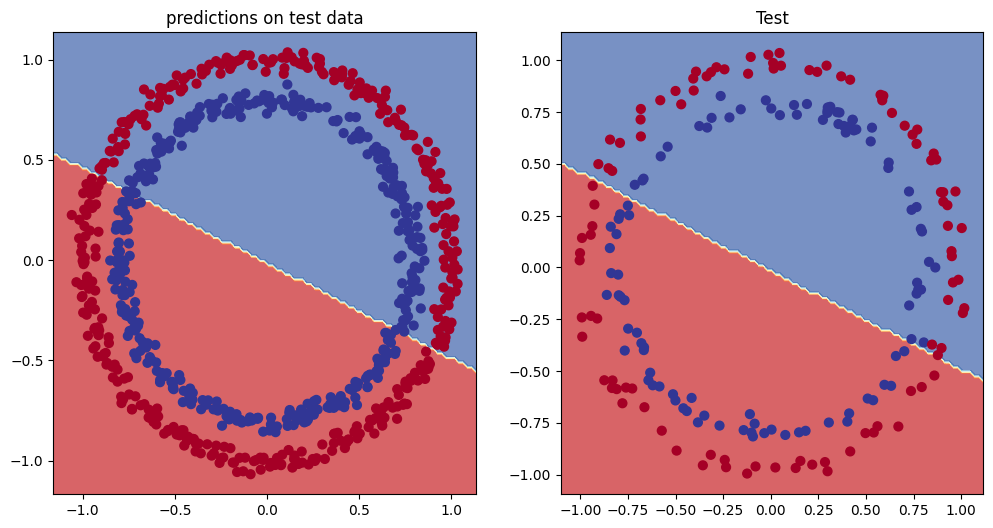

In [38]:
# Plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.title("predictions on test data")
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)
plt.show()

In [39]:
device

'cpu'

## 5. Improving a model(From a model perspective)

- Add more layers - give the model more chances to learn about patterns in the data

- add more hidden units - go from 5 hidden units to 10 hidden units

- Fit for longer

- Change the activation function

- change the loss function

These options are all from a model's perspective because they deal directly with the model, rather than the data.

And because these options are all values we (as machine learning engineers and data scientists) can change, they are referred as **hyperparameters**.

Let's try and improve our model by:

- Adding more hidden units: 5 -> 10
- increase the number of layers: 2 -> 3
- increase the number of epochs: 100 -> 100

In [40]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2,out_features=10)
    self.layer_2 = nn.Linear(in_features=10,out_features=10)
    self.layer_3 = nn.Linear(in_features=10,out_features=1)

  def forward(self,x):
    return self.layer_3(self.layer_2(self.layer_1(x)))

  # def forward(self,x):
   # z = self.layer_1(x)
    #z = self.layer_2(z)
    #z = self.layer_3(z)
    #return z

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [41]:
# Create a loss function
loss_fn = nn.BCEWithLogitsLoss()
# Create an optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

# Write a training and evaluation loop for model_1
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Train for longer
epochs = 1000

# Put data to target device
X_train,y_train = X_train.to(device),y_train.to(device)
X_test,y_test = X_test.to(device),y_test.to(device)

for epoch in range (epochs):
  ### Training
  model_1.train()

  # 1. Forward pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))
  # 2. Calculate loss/acc
  loss = loss_fn(y_logits,
                 y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)
  #3. Optimizer zero grad
  optimizer.zero_grad()
  #4. Loss backward(backpropagation)
  loss.backward()
  #5. Optimizer step
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. calculate test loss/acc
    test_loss = loss_fn(test_logits,
                        y_test)

    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

  # Print out what is happening
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")



Epoch: 0 | Loss: 0.69396, Acc: 50.88% | Test Loss: 0.69261, Test Acc: 51.00%
Epoch: 100 | Loss: 0.69305, Acc: 50.38% | Test Loss: 0.69379, Test Acc: 48.00%
Epoch: 200 | Loss: 0.69299, Acc: 51.12% | Test Loss: 0.69437, Test Acc: 46.00%
Epoch: 300 | Loss: 0.69298, Acc: 51.62% | Test Loss: 0.69458, Test Acc: 45.00%
Epoch: 400 | Loss: 0.69298, Acc: 51.12% | Test Loss: 0.69465, Test Acc: 46.00%
Epoch: 500 | Loss: 0.69298, Acc: 51.00% | Test Loss: 0.69467, Test Acc: 46.00%
Epoch: 600 | Loss: 0.69298, Acc: 51.00% | Test Loss: 0.69468, Test Acc: 46.00%
Epoch: 700 | Loss: 0.69298, Acc: 51.00% | Test Loss: 0.69468, Test Acc: 46.00%
Epoch: 800 | Loss: 0.69298, Acc: 51.00% | Test Loss: 0.69468, Test Acc: 46.00%
Epoch: 900 | Loss: 0.69298, Acc: 51.00% | Test Loss: 0.69468, Test Acc: 46.00%


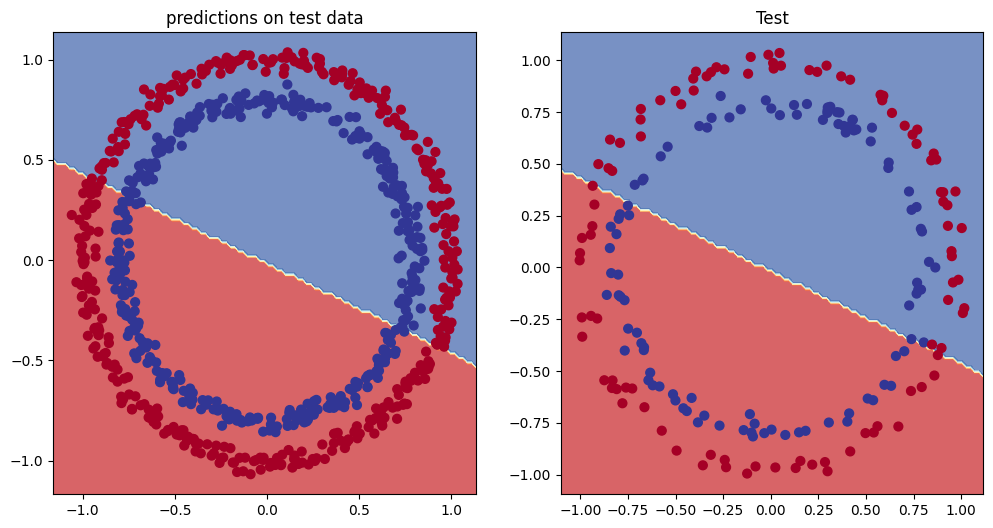

In [42]:
# Plot the decision boundary
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.title("predictions on test data")
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)
plt.show()

### 5.1 Preparing data to see if our model can fit a straight line

In [43]:
# Create some data as O1 course

weight = 0.7
bias = 0.3
start =  0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start,end,step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias

train_split = int(0.8 * len(X_regression))
X_train_regression,y_train_regression = X_regression[:train_split],y_regression[:train_split]
X_test_regression,y_test_regression = X_regression[train_split:],y_regression[train_split:]

In [44]:
len(X_train_regression),len(y_train_regression),len(X_test_regression),len(y_test_regression)

(80, 80, 20, 20)

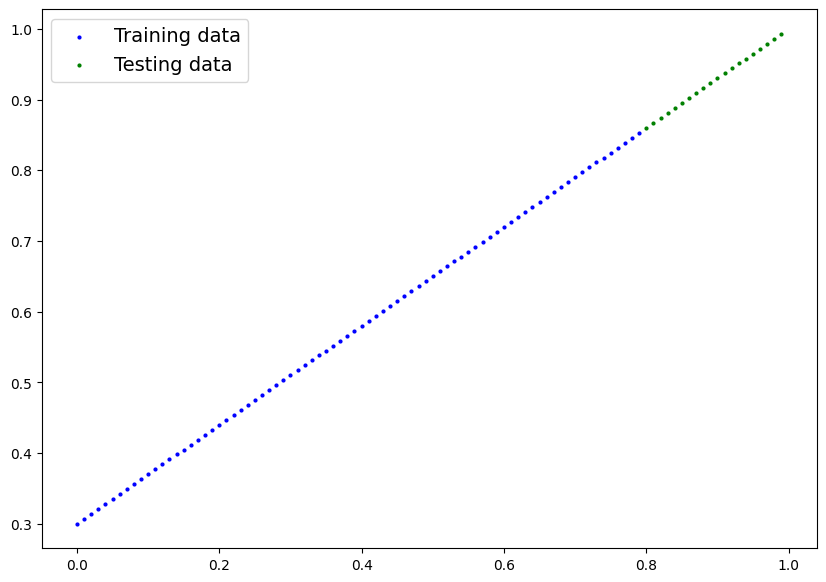

In [45]:
plot_predictions(train_data=X_train_regression,
                 train_labels= y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression,
                 predictions=None)



In [46]:
X_train_regression[:5],y_test_regression[:5]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.8600],
         [0.8670],
         [0.8740],
         [0.8810],
         [0.8880]]))

### 5.2 Adjusing `model_1` to fit a straight line

In [47]:
# Same architecture as model_1 but using nn.Sequential
model_2 = nn.Sequential(
    nn.Linear(in_features=1,out_features=10),
    nn.Linear(in_features=10,out_features=10),
    nn.Linear(in_features=10,out_features=1)
).to(device)

model_2


Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [48]:
# LOss and Optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.001)


In [49]:
# Train the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put the data on the target device
X_train_regression,y_train_regression = X_train_regression.to(device),y_train_regression.to(device)
X_test_regression,y_test_regression = X_test_regression.to(device),y_test_regression.to(device)

# Training
for epoch in range(epochs):
  y_pred = model_2(X_train_regression)
  loss = loss_fn(y_pred,y_train_regression)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # Testing
  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test_regression)
    test_loss = loss_fn(test_pred,y_test_regression)

  # Print out what's happening
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test Loss: {test_loss:.5f}")


Epoch: 0 | Loss: 0.75986 | Test Loss: 0.94965
Epoch: 100 | Loss: 0.40272 | Test Loss: 0.54029
Epoch: 200 | Loss: 0.05876 | Test Loss: 0.13480
Epoch: 300 | Loss: 0.01461 | Test Loss: 0.03342
Epoch: 400 | Loss: 0.00308 | Test Loss: 0.00008
Epoch: 500 | Loss: 0.00309 | Test Loss: 0.00012
Epoch: 600 | Loss: 0.00309 | Test Loss: 0.00018
Epoch: 700 | Loss: 0.00299 | Test Loss: 0.00011
Epoch: 800 | Loss: 0.00299 | Test Loss: 0.00016
Epoch: 900 | Loss: 0.00289 | Test Loss: 0.00011


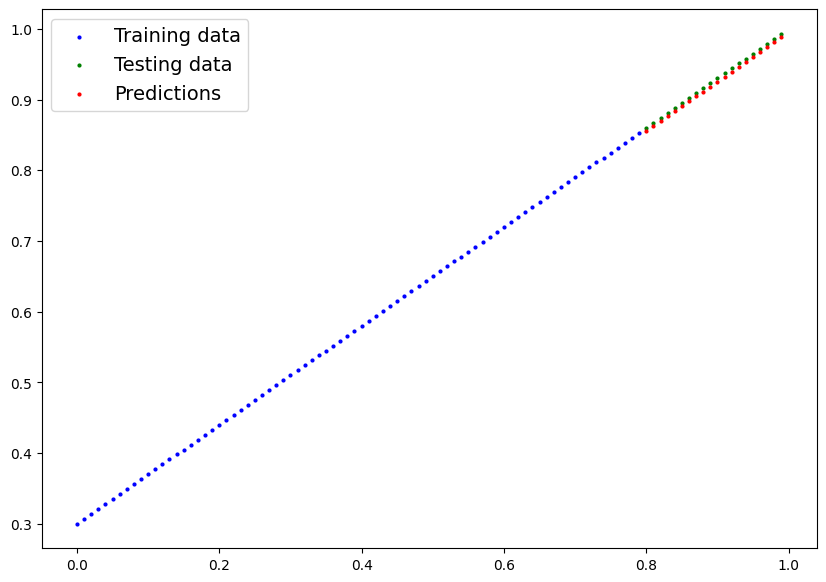

In [50]:
model_2.eval()
# make prediction
with torch.inference_mode():
  y_preds = model_2(X_test_regression)

# plot data and predictions
plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu())
#

## 6. The missing piece: non-linearity

"What patterns could you draw if you were given an infinite amount of a straight and non-straight lines?"

or in machine learning terms,an infinite(but really it is finite) of linear and non-linear functions


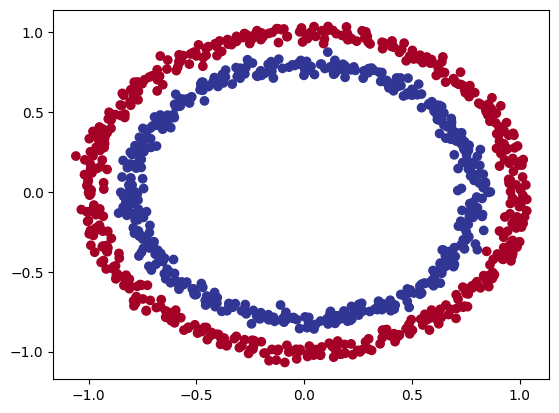

In [51]:
### 6.1 Recreate non-linear data(red and blue circles)
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X,y = make_circles(n_samples,
                                  noise=0.03,
                                  random_state=42)
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)


In [52]:
# Convert data to tensors then to train and test split
import torch
from sklearn.model_selection import train_test_split

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 test_size=0.2,
                                                 random_state=42)

X_train[:5],y_train[:5]


(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

### 6.2 Building a model with non-linearity

Artificial bneural networks are a large combination of linear and non linear functions which are potentially able to find patterns in data

In [53]:
# Building a model with non-linear activation functions
from torch import nn

class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2,out_features=10)
    self.layer_2 = nn.Linear(in_features=10,out_features=10)
    self.layer_3 = nn.Linear(in_features=10,out_features=1)
    self.relu = nn.ReLU() # Relu is a non-linear activation function

  def forward(self,x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [54]:
# Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_3.parameters(),
                            lr=0.01)


### 6.3 Training a model with non-linearity


In [55]:
# Random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Put data on target device
X_train,y_train = X_train.to(device),y_train.to(device)
X_test,y_test = X_test.to(device),y_test.to(device)

# Loop through data
epochs = 1000

for epoch in range(epochs):
  ### Training
  model_3.train()

  # 1. Forward pass
  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # 2. Calculate loss/acc
  loss = loss_fn(y_logits,
                 y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  # 3. optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ### Testing
  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits,
                        y_test)

    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

  # Print out what's happening
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.69295, Acc: 50.00% | Test Loss: 0.69325, Test Acc: 50.00%
Epoch: 100 | Loss: 0.69248, Acc: 50.38% | Test Loss: 0.69264, Test Acc: 50.00%
Epoch: 200 | Loss: 0.69225, Acc: 59.00% | Test Loss: 0.69233, Test Acc: 56.00%
Epoch: 300 | Loss: 0.69209, Acc: 70.12% | Test Loss: 0.69214, Test Acc: 67.00%
Epoch: 400 | Loss: 0.69195, Acc: 68.38% | Test Loss: 0.69197, Test Acc: 70.00%
Epoch: 500 | Loss: 0.69181, Acc: 58.50% | Test Loss: 0.69179, Test Acc: 62.00%
Epoch: 600 | Loss: 0.69168, Acc: 54.00% | Test Loss: 0.69163, Test Acc: 56.00%
Epoch: 700 | Loss: 0.69155, Acc: 53.25% | Test Loss: 0.69148, Test Acc: 53.00%
Epoch: 800 | Loss: 0.69141, Acc: 52.62% | Test Loss: 0.69133, Test Acc: 53.00%
Epoch: 900 | Loss: 0.69128, Acc: 52.75% | Test Loss: 0.69118, Test Acc: 53.00%


### 6.4 Evaluating a model trained with non-linear activation functions


In [56]:
# Makes predictions
model_3.eval()
with torch.inference_mode():
  y_logits = model_3(X_test).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))

y_preds[:10],y_test[:10]

(tensor([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

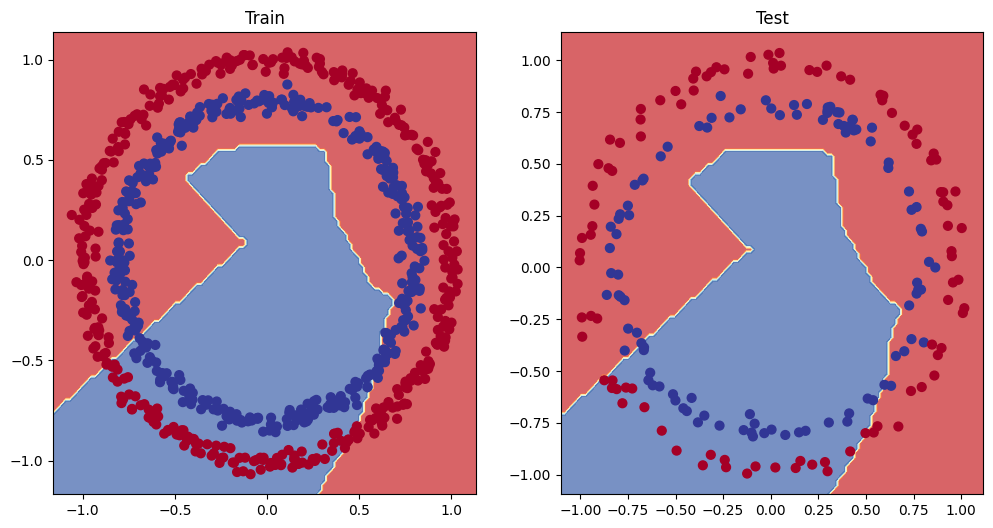

In [57]:
# Plot decision boundaries
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)
plt.show()

## 7. Replicating non-linear activation functions

Neural networks, rather than us telling the model what to learn, we give it the tools to discover patterns in data and it tries to figure out the patterns on its own

and these tools are linear & non-linear

In [58]:
# Create a tensor
A = torch.arange(-10,10,1,dtype=torch.float32)
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

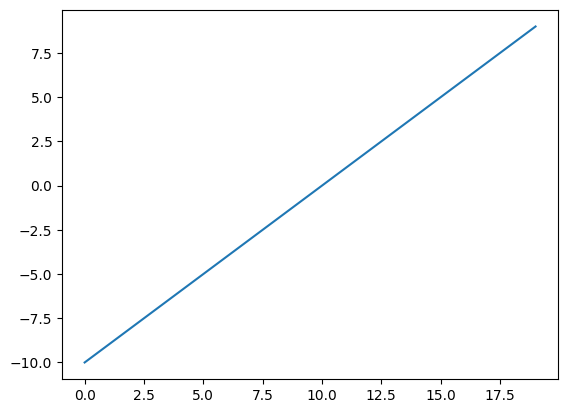

In [59]:
# Visualize
plt.plot(A)

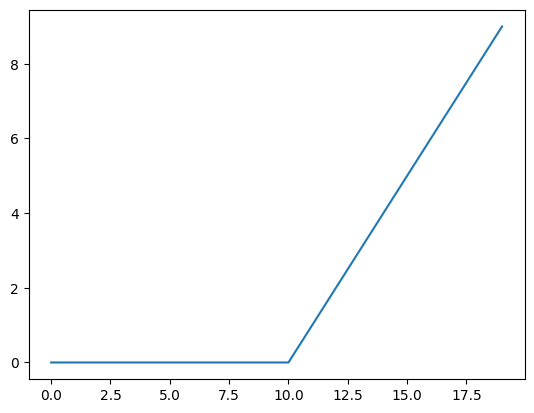

In [60]:
plt.plot(torch.relu(A))

In [61]:
def relu(x: torch.Tensor):
  return torch.maximum(torch.tensor(0),x)

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

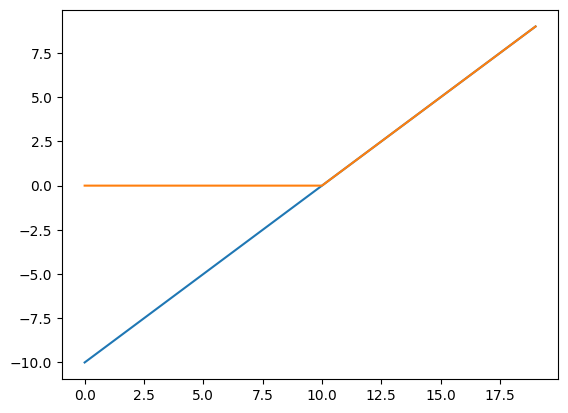

In [62]:
# Plot ReLU activation function
plt.plot(A)
plt.plot(relu(A))

In [63]:
# Now let's do the same with sigmoid
def sigmoid(x):
  return 1 / (1+torch.exp(-x))

sigmoid(A)

tensor([4.5398e-05, 1.2339e-04, 3.3535e-04, 9.1105e-04, 2.4726e-03, 6.6929e-03,
        1.7986e-02, 4.7426e-02, 1.1920e-01, 2.6894e-01, 5.0000e-01, 7.3106e-01,
        8.8080e-01, 9.5257e-01, 9.8201e-01, 9.9331e-01, 9.9753e-01, 9.9909e-01,
        9.9966e-01, 9.9988e-01])

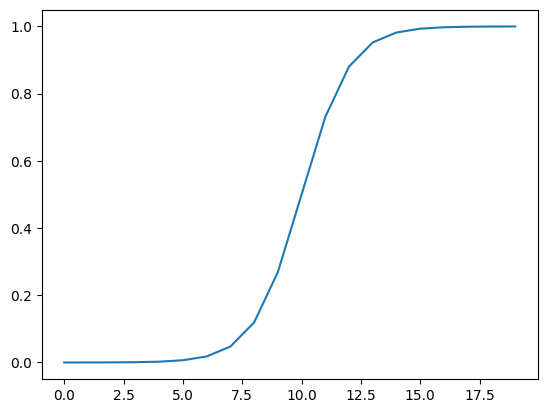

In [64]:
plt.plot(sigmoid(A))

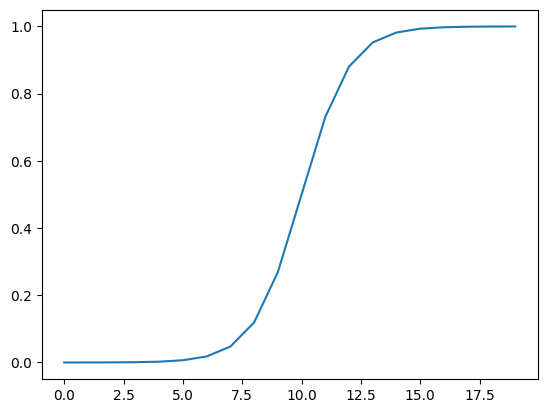

In [65]:
plt.plot(torch.sigmoid(A))


## 8. Putting it all together with a multi-class classification

* Binary classification: only two classes(one thing or another : cat vs dog, fraud not fraud)
* Multi-class classification: more than two classes(more than one thing(cat vs dog vs chicken))

### 8.1 Creating a toy multi-class dataset



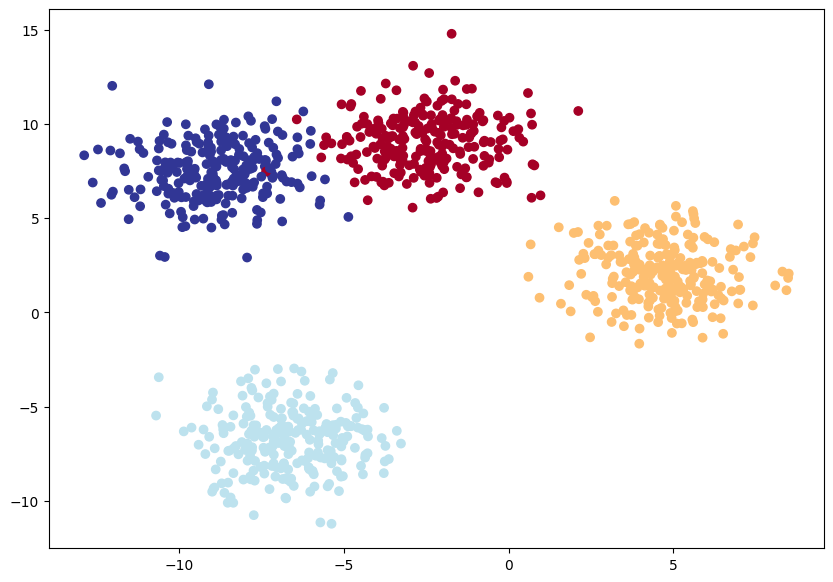

In [66]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# Create the data
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5, # Give the clusters a little shake up
                            random_state=RANDOM_SEED)

# Create tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# Split into train and test
X_train,X_test,y_train,y_test = train_test_split(X_blob,
                                                 y_blob,
                                                 test_size=0.2,
                                                 random_state=RANDOM_SEED)
# Plot data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)

### 8.2 Building a multi class classification model in pytorch


In [67]:
# Create device agnostic device
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [68]:

# Build a multi-class model
class BlobModel(nn.Module):
  def __init__(self,input_features,output_features,hidden_units=8):
    """
    INitializes multi-class classification model

    Args:
      input_features (int): number of input features to the model
      output_features (int): number of output features of the model
      hidden_units (int): number of hidden units between layers, default 8
    """
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=output_features)
    )
  def forward(self,x):
    return self.linear_layer_stack(x)

# Create an instance of blobmodel
model_4 = BlobModel(input_features=2,
                    output_features=4,
                    hidden_units=8).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

### 8.3 create a loss function and an optimizer for a multi-class classification

In [69]:
# Create a loss
loss_fn = nn.CrossEntropyLoss()

# Create an optimizer
optimizer = torch.optim.SGD(params=model_4.parameters(),
                            lr=0.1)


### 8.4 Getting prediction probabilities for multi-class model




In [70]:
### 8.4 Getting prediction probabilities for multi-class model
model_4.eval()
with torch.inference_mode():
  y_preds = model_4(X_test.to(device))

y_preds[:10]

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834],
        [-0.1497, -1.0617, -0.7107, -0.1645],
        [ 0.1539, -0.2887,  0.1520, -0.0109],
        [-0.2154, -1.1795, -0.9300, -0.2745],
        [ 0.2443, -0.2472,  0.1649,  0.0061],
        [-0.2329, -1.2120, -0.9849, -0.3004]])


In order to evaluate and train and test our model, we need to convert our model's outputs(logits) to prediction probabilities and then to prediction labels.

Logits (raw output of the model) -> pred probs(use `torch.softmax`) -> pred labels (take the argmax of the prediction probabilities

In [71]:
# Convert our model's logit to predictions probabilities
y_preb_probs = torch.softmax(y_preds,dim=1)
print(y_preb_probs[:10])
print(y_preds[:10])

tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463],
        [0.3381, 0.1358, 0.1929, 0.3331],
        [0.2867, 0.1841, 0.2861, 0.2431],
        [0.3554, 0.1355, 0.1740, 0.3351],
        [0.3009, 0.1841, 0.2779, 0.2371],
        [0.3595, 0.1350, 0.1695, 0.3360]])
tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834],
        [-0.1497, -1.0617, -0.7107, -0.1645],
        [ 0.1539, -0.2887,  0.1520, -0.0109],
        [-0.2154, -1.1795, -0.9300, -0.2745],
        [ 0.2443, -0.2472,  0.1649,  0.0061],
        [-0.2329, -1.2120, -0.9849, -0.3004]])


In [72]:
torch.sum(y_preb_probs[0])

tensor(1.0000)

In [73]:
torch.argmax(y_preb_probs[0])

tensor(1)

In [74]:
# Convert our model's predictions probabilities to prediction labels
y_preds_labels = torch.argmax(y_preb_probs,dim=1)
y_preds_labels

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1])

In [75]:
y_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

### 8.5 Creating a training looop amd testing loop for a multi-class pytorch model


In [76]:
# Fit the model to the data
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
epochs = 1000

# Put data on target device
X_train,y_train = X_train.to(device),y_train.to(device)
X_test,y_test = X_test.to(device),y_test.to(device)

# Loop through data
for epoch in range(epochs):
  ### Training
  model_4.train()

  # 1. Forward pass
  y_logits = model_4(X_train).squeeze()
  y_pred = torch.softmax(y_logits,dim=1).argmax(dim=1)

  # 2. calculate loss
  loss = loss_fn(y_logits,y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)
  # 3. Optimizer zero grad
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  ### Training
  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_test).squeeze()
    test_pred = torch.softmax(test_logits,dim=1).argmax(dim=1)

    test_loss = loss_fn(test_logits,y_test)

    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

  # Print out
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 1.15883, Acc: 40.38% | Test Loss: 1.07554, Test Acc: 48.00%
Epoch: 100 | Loss: 0.03312, Acc: 99.25% | Test Loss: 0.02433, Test Acc: 99.50%
Epoch: 200 | Loss: 0.02657, Acc: 99.25% | Test Loss: 0.01651, Test Acc: 99.50%
Epoch: 300 | Loss: 0.02503, Acc: 99.25% | Test Loss: 0.01440, Test Acc: 99.50%
Epoch: 400 | Loss: 0.02427, Acc: 99.25% | Test Loss: 0.01335, Test Acc: 99.50%
Epoch: 500 | Loss: 0.02377, Acc: 99.25% | Test Loss: 0.01269, Test Acc: 99.50%
Epoch: 600 | Loss: 0.02339, Acc: 99.25% | Test Loss: 0.01218, Test Acc: 99.50%
Epoch: 700 | Loss: 0.02307, Acc: 99.25% | Test Loss: 0.01179, Test Acc: 99.50%
Epoch: 800 | Loss: 0.02279, Acc: 99.25% | Test Loss: 0.01147, Test Acc: 99.50%
Epoch: 900 | Loss: 0.02253, Acc: 99.25% | Test Loss: 0.01120, Test Acc: 99.50%


In [77]:
# Make predictions
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_test).squeeze()


y_logits[:10]

tensor([[ -2.3751,  10.9387, -10.2038, -11.3271],
        [ -2.1934,  -9.4839,  -6.3062,   5.2289],
        [ -4.9855,  -5.3790,   5.3840,  -4.3115],
        [ -3.0428,   8.1532,  -5.4971,  -6.6867],
        [  6.4903,  -2.8975, -12.3324,  -8.4675],
        [ -2.7723, -11.1927,  -7.4741,   6.3901],
        [ -4.3608,  -4.5814,   4.6891,  -3.5910],
        [  5.8017,  -6.8308,  -9.7351,  -4.1265],
        [ -6.3789,  -6.9228,   6.6639,  -5.5251],
        [  6.2822,  -5.5357, -10.3558,  -5.4748]])

In [78]:
# GO from logits -> prediction probabilities
y_pred_probs = torch.softmax(y_logits,dim=1)
y_pred_probs[:10]

tensor([[1.6515e-06, 1.0000e+00, 6.5754e-10, 2.1385e-10],
        [5.9742e-04, 4.0741e-07, 9.7747e-06, 9.9939e-01],
        [3.1371e-05, 2.1165e-05, 9.9989e-01, 6.1552e-05],
        [1.3729e-05, 9.9998e-01, 1.1796e-06, 3.5901e-07],
        [9.9992e-01, 8.3726e-05, 6.6887e-09, 3.1906e-07],
        [1.0490e-04, 2.3112e-08, 9.5245e-07, 9.9989e-01],
        [1.1735e-04, 9.4120e-05, 9.9954e-01, 2.5340e-04],
        [9.9995e-01, 3.2638e-06, 1.7882e-07, 4.8777e-05],
        [2.1657e-06, 1.2571e-06, 9.9999e-01, 5.0863e-06],
        [9.9998e-01, 7.3709e-06, 5.9454e-08, 7.8339e-06]])

In [82]:
# Go from pred probs to pred labels
y_preds_labels = torch.argmax(y_pred_probs,dim=1)
y_preds_labels[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [84]:
y_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

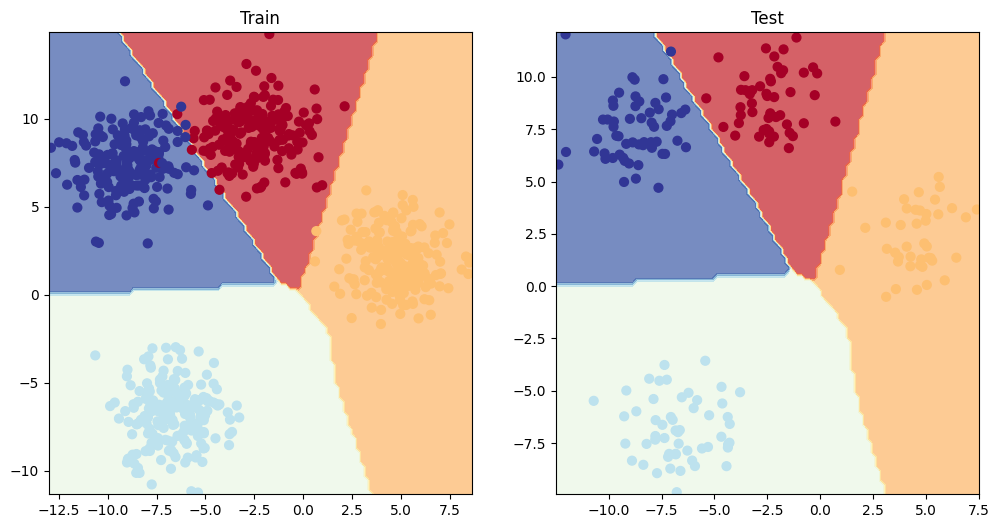

In [85]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_test, y_test)
plt.show()

## 9. A few more classification metrics.. (To evaluate our classification model)

* Accuracy - out of 100 samples, how many does our model get right
*precision
*Recall
* f1-score
*confusion metrix
* classification report

Search when to use these metrics

In [88]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.9/981.9 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 67.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 30.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 91.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [91]:
from torchmetrics import Accuracy

# setup metric
torchmetrics_accuracy = Accuracy(task="multiclass", num_classes=4).to(device)

# Calculate accuracy
torchmetrics_accuracy(y_preds_labels,y_test)

tensor(0.9950)